In [10]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
print('Libraries Imported')

Libraries Imported


In [3]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

file_loc = "E:\\final\\random1.csv"

trainset1 = pd.read_csv(file_loc)
trainset2 = pd.read_excel(r'E:\\final\\insurance_syn_hackathon_phase1.xlsx')
X, y = iris.data, iris.target

to_predict_children_set = pd.concat([trainset1,trainset2['NO_OF_CHILDREN2']], axis = 1)

to_predict_children_set = to_predict_children_set.sort_values(by=['NO_OF_CHILDREN2'] ,ascending=False)

to_predict_children_train = to_predict_children_set.iloc[:51902,:]
to_predict_children_test = to_predict_children_set.iloc[51902:,:]

clf = OneVsRestClassifier(LinearSVC(random_state=0))
p = clf.fit(to_predict_children_train.iloc[:,1:34],to_predict_children_train['payment_pr1q_num_past_due_30d'])
p.predict(to_predict_children_test.iloc[:,1:34]) 


NameError: name 'iris' is not defined

In [11]:
p.predict(to_predict_children_train.iloc[:,1:34]) 

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
target = trainset1['lapse_var']
trainsetu = trainset1.drop(['lapse_var'],axis = 1)

predictors = trainsetu.iloc[:,2:34]
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
x_train

,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,...,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d
18621,0,1,0,0,1,0,0,0,0,0,...,62.295170,20.920378,47.171270,1.510000e+07,1,0,0,0,19822.684150,0.0
24816,1,0,0,0,0,0,0,0,0,0,...,89.290747,48.511344,41.566838,1.500000e+07,0,1,0,0,6226.537365,0.0
30974,1,0,0,0,0,0,0,0,0,0,...,6.896725,22.660321,81.295364,1.440000e+07,1,0,0,0,6059.849190,0.0
25846,1,0,0,0,0,0,1,0,0,0,...,26.339829,48.080176,11.286088,1.222777e+07,1,0,0,0,6205.542197,0.0
20861,0,0,0,1,0,0,0,0,0,0,...,12.033935,47.947379,47.222997,4.011703e+06,1,0,0,0,6196.674783,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28249,0,1,0,0,0,0,0,0,0,0,...,37.615504,82.459915,70.396965,7.223179e+06,1,0,0,0,13338.550860,1.0
51504,0,1,0,0,0,0,0,0,0,0,...,36.863839,82.648521,12.939493,7.200148e+06,1,0,0,0,9658.616785,0.0
22493,1,0,0,0,0,0,0,0,0,0,...,7.174492,55.737912,58.230877,8.357801e+06,1,0,0,0,6120.575121,1.0
3619,1,0,0,0,0,0,0,0,1,0,...,51.139520,47.953467,26.623029,2.070000e+07,1,0,0,0,2852.680187,0.0


In [21]:
clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)
print(matrix)
print(report)
count = 0
for i in range(12002):
    if preds[i] == 1:
        count += 1
print(count)

[[11176     0]
 [  826     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11176
           1       0.00      0.00      0.00       826

    accuracy                           0.93     12002
   macro avg       0.47      0.50      0.48     12002
weighted avg       0.87      0.93      0.90     12002

0


c:\users\kavinda\anaconda3\envs\opencv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

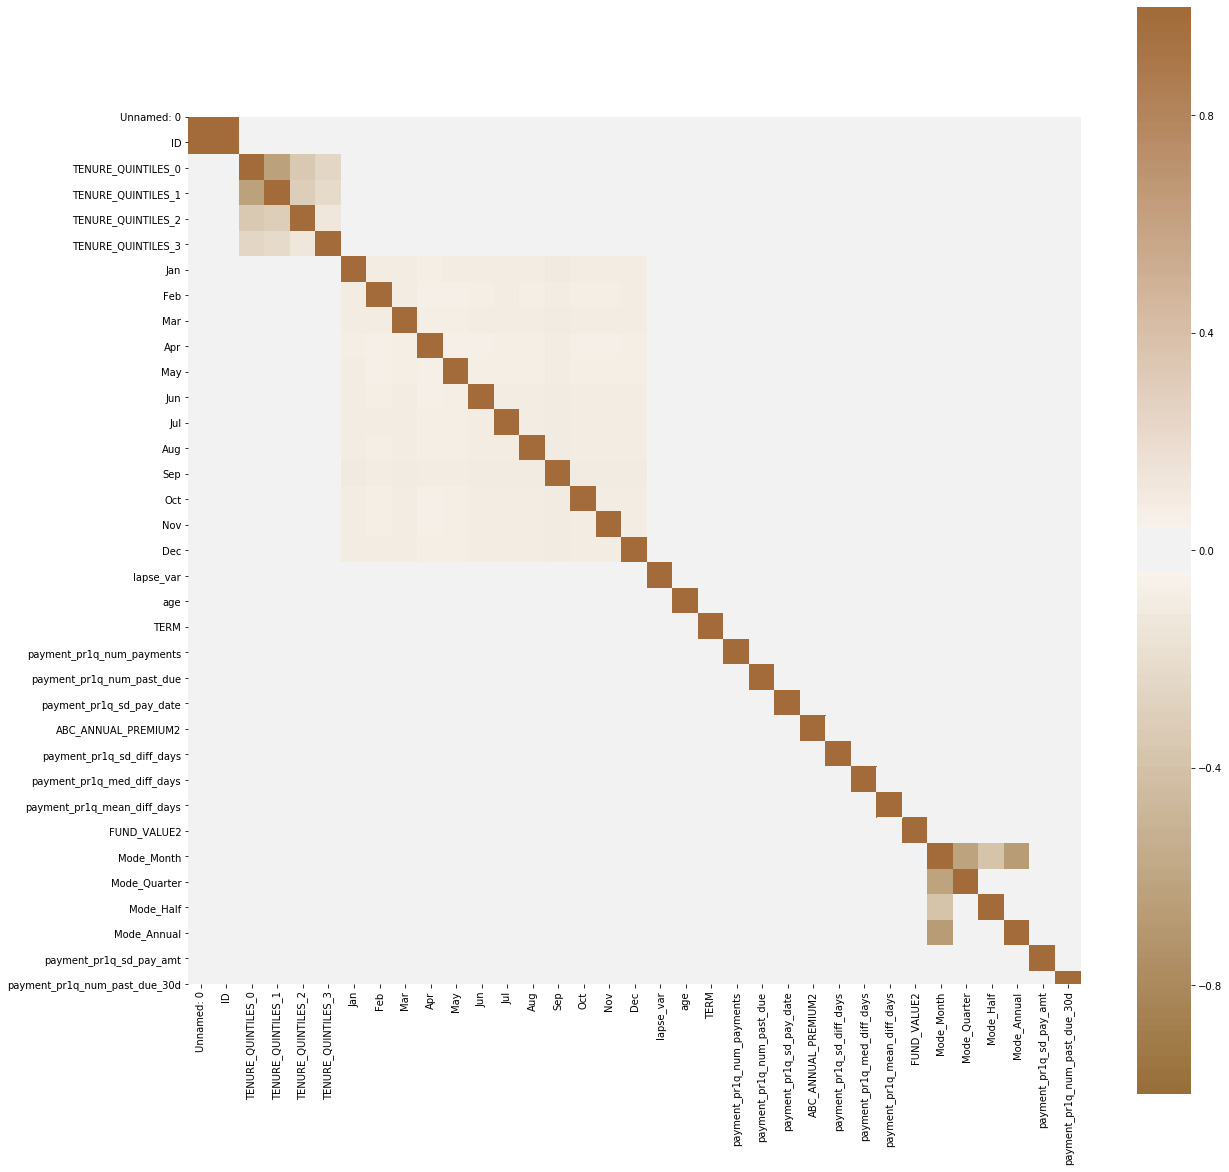

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X = trainset1.iloc[:,0:21]    #target column i.e price range
#get correlations of each features in dataset
corr = trainset1.corr()
plt.figure(figsize=(20,20))
#plot heat map
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(50, 400, n=200),square=True)

In [24]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# For reproducibility
np.random.seed(1237)

ModuleNotFoundError: No module named 'keras'

In [ ]:
path_train = "20news-bydate/20news-bydate-train"

files_train = skds.load_files(path_train,load_content=False)

label_index = files_train.target
label_names = files_train.target_names
labelled_files = files_train.filenames

data_tags = ["filename","category","news"]
data_list = []

# Read and add data from file to a list
i=0
for f in labelled_files:
    data_list.append((f,label_names[label_index[i]],Path(f).read_text()))
    i += 1

# We have training data available as dictionary filename, category, data
data = pd.DataFrame.from_records(data_list, columns=data_tags)

# 20 news groups
num_labels = 20
vocab_size = 15000
batch_size = 100
num_epochs = 30

In [ ]:
for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    #print(test_files_names.iloc[i])
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label)

In [ ]:
prediction = model.predict(x_test)
predictions = np.argmax(prediction, axis = 1)
predictions

In [26]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [27]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.2)

In [40]:
model=Sequential([Dense(200,input_shape=(34,),activation='relu'),
                  Dense(200,activation='relu'),
                  Dense(5,activation='softmax')])
model.compile(loss='categorical_crossentropy',optimizer='adam',matrics=['Accuracy'])
model.fit(x_train,y_train,epochs=100,val_set=(x_test,y_test))
model.evaluate(x_test,y_test)
model.predict()

TypeError: Unrecognized keyword arguments: {'val_set': (       TENURE_QUINTILES_0  TENURE_QUINTILES_1  TENURE_QUINTILES_2  \
11811                   1                   0                   0   
26126                   0                   0                   1   
16003                   0                   1                   0   
5038                    1                   0                   0   
6252                    1                   0                   0   
...                   ...                 ...                 ...   
18987                   1                   0                   0   
57765                   1                   0                   0   
20165                   1                   0                   0   
26803                   1                   0                   0   
17163                   0                   1                   0   

       TENURE_QUINTILES_3  Jan  Feb  Mar  Apr  May  Jun  ...  \
11811                   0    0    0    0    1    0    0  ...   
26126                   0    0    0    0    0    1    0  ...   
16003                   0    0    0    0    0    0    0  ...   
5038                    0    0    0    0    0    0    0  ...   
6252                    0    0    0    1    0    0    0  ...   
...                   ...  ...  ...  ...  ...  ...  ...  ...   
18987                   0    0    0    0    1    0    0  ...   
57765                   0    0    0    0    0    0    1  ...   
20165                   0    0    0    1    0    0    0  ...   
26803                   0    0    0    0    1    0    0  ...   
17163                   0    0    0    0    0    0    1  ...   

       payment_pr1q_sd_diff_days  payment_pr1q_med_diff_days  \
11811                  17.839324                   84.106279   
26126                  33.165668                   47.936494   
16003                  47.955384                   60.719674   
5038                   37.344052                   47.848234   
6252                    8.016452                   25.020869   
...                          ...                         ...   
18987                  35.342551                   23.671197   
57765                  36.068154                   28.701623   
20165                  37.418246                    5.550437   
26803                   5.207498                   48.300228   
17163                  23.483038                   77.839988   

       payment_pr1q_mean_diff_days   FUND_VALUE2  Mode_Month  Mode_Quarter  \
11811                    49.465753  1.070000e+07           1             0   
26126                    46.390858  1.230411e+07           1             0   
16003                    75.050442  1.234536e+07           1             0   
5038                     46.877369  5.781877e+06           1             0   
6252                     30.750283  1.150000e+07           1             0   
...                            ...           ...         ...           ...   
18987                    73.128122  1.590000e+07           1             0   
57765                    46.200116  1.237334e+07           1             0   
20165                    84.558073  1.020000e+07           1             0   
26803                    46.572902  9.078455e+06           1             0   
17163                    11.563569  1.237784e+07           1             0   

       Mode_Half  Mode_Annual  payment_pr1q_sd_pay_amt  \
11811          0            0             10135.004000   
26126          0            0              6163.574142   
16003          0            0               724.238096   
5038           0            0              6521.531217   
6252           0            0              7045.153096   
...          ...          ...                      ...   
18987          0            0              9611.896738   
57765          0            0              6133.855999   
20165          0            0              6108.368731   
26803          0            0              6187.465604   
17163          0            0              9459.953196   

       payment_pr1q_num_past_due_30d  
11811                            1.0  
26126                            0.0  
16003                            1.0  
5038                             1.0  
6252                             0.0  
...                              ...  
18987                            0.0  
57765                            0.0  
20165                            0.0  
26803                            1.0  
17163                            1.0  

[12002 rows x 32 columns], 11811    0
26126    0
16003    1
5038     0
6252     0
        ..
18987    0
57765    0
20165    0
26803    0
17163    0
Name: lapse_var, Length: 12002, dtype: int64)}

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

X=df[list('ABCD')]
Y=p

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

knc.fit(X_train, Y_train)
Y_pred = knc.predict(X_test)

In [75]:
trainset1 = pd.read_csv("E:\\output6.csv")
trainset2 = pd.read_excel(r'E:\\hackstat final round\\insurance_syn_hackathon_phase1.xlsx')

In [76]:
import pandas as pd
import numpy as np
df = trainset1
# df['sex']  = [np.random.choice(['male', 'female']) for x in range(len(df))]
# df['weight'] = [np.random.choice(['underweight', 
#         'normal', 'overweight', 'obese']) for x in range(len(df)) ]

In [77]:
df.head()

,Unnamed: 0,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,...,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d
0,0,1,0,1,0,0,0,0,0,0,...,52.960115,95.810812,46.854693,1.251947e+07,1,0,0,0,6087.007464,1.0
1,1,2,0,0,1,0,0,0,1,0,...,8.775671,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914,0.0
2,2,3,0,0,1,0,1,0,0,0,...,40.504105,52.123828,14.498615,1.235961e+07,1,0,0,0,11687.537130,1.0
3,3,4,1,0,0,0,0,0,1,0,...,19.587609,40.171606,23.824406,6.667302e+06,1,0,0,0,11349.370640,0.0
4,4,5,1,0,0,0,0,0,0,0,...,8.756755,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688,1.0


In [78]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

X=df.iloc[:,1:32]
Y=pd.DataFrame(mlb.fit_transform(trainset2[['NO_OF_CHILDREN2']].values), columns=mlb.classes_, index=df.index

TypeError: 'tuple' object is not callable

In [69]:
# from sklearn.neighbors import RandomfClassifier

knc = RandomForestClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

knc.fit(X_train, Y_train)
Y_pred = knc.predict(X_test)

MemoryError: Unable to allocate array with shape (45005, 8111) and data type int32

In [ ]:
Y_pred

In [63]:
df.iloc[:,2:37]

,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,...,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual,payment_pr1q_sd_pay_amt,payment_pr1q_num_past_due_30d
0,0,1,0,0,0,0,0,0,1,0,...,52.960115,95.810812,46.854693,1.251947e+07,1,0,0,0,6087.007464,1.0
1,0,0,1,0,0,0,1,0,0,0,...,8.775671,47.964398,46.215029,3.790000e+07,1,0,0,0,3050.669914,0.0
2,0,0,1,0,1,0,0,0,0,0,...,40.504105,52.123828,14.498615,1.235961e+07,1,0,0,0,11687.537130,1.0
3,1,0,0,0,0,0,1,0,0,0,...,19.587609,40.171606,23.824406,6.667302e+06,1,0,0,0,11349.370640,0.0
4,1,0,0,0,0,0,0,0,0,0,...,8.756755,48.383747,0.931913,1.232416e+07,1,0,0,0,8186.397688,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,0,1,0,0,0,1,0,0,0,0,...,37.885844,47.410430,50.412955,1.530000e+07,1,0,0,0,6061.437250,1.0
60003,0,0,0,1,0,0,0,0,0,1,...,68.550539,90.992461,39.284992,1.258011e+07,1,0,0,0,8937.487299,1.0
60004,1,0,0,0,0,0,0,1,0,0,...,36.576560,97.129089,26.433686,8.939695e+06,1,0,0,0,5937.025298,0.0
60005,0,1,0,0,0,0,0,0,0,0,...,37.153049,47.403801,73.894707,2.040000e+07,1,0,0,0,2241.004176,0.0


In [79]:
X

,ID,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,...,payment_pr1q_num_past_due,payment_pr1q_sd_pay_date,ABC_ANNUAL_PREMIUM2,payment_pr1q_sd_diff_days,payment_pr1q_med_diff_days,payment_pr1q_mean_diff_days,FUND_VALUE2,Mode_Month,Mode_Quarter,Mode_Half
0,1,0,1,0,0,0,0,0,0,1,...,3.871131,6.927565,14847.775340,52.960115,95.810812,46.854693,1.251947e+07,1,0,0
1,2,0,0,1,0,0,0,1,0,0,...,4.037578,5.751818,18127.102540,8.775671,47.964398,46.215029,3.790000e+07,1,0,0
2,3,0,0,1,0,1,0,0,0,0,...,0.947059,8.148305,103898.557300,40.504105,52.123828,14.498615,1.235961e+07,1,0,0
3,4,1,0,0,0,0,0,1,0,0,...,4.033237,12.255236,69416.253665,19.587609,40.171606,23.824406,6.667302e+06,1,0,0
4,5,1,0,0,0,0,0,0,0,0,...,1.107156,4.362300,68452.107019,8.756755,48.383747,0.931913,1.232416e+07,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,0,1,0,0,0,1,0,0,0,...,4.136871,1.810030,180299.313400,37.885844,47.410430,50.412955,1.530000e+07,1,0,0
60003,60004,0,0,0,1,0,0,0,0,0,...,1.068679,2.280073,168677.035200,68.550539,90.992461,39.284992,1.258011e+07,1,0,0
60004,60005,1,0,0,0,0,0,0,1,0,...,3.648770,1.364022,72870.859220,36.576560,97.129089,26.433686,8.939695e+06,1,0,0
60005,60006,0,1,0,0,0,0,0,0,0,...,0.487497,7.729683,46153.087080,37.153049,47.403801,73.894707,2.040000e+07,1,0,0


In [80]:
Y

,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60004,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
to_predict_children_set = pd.concat([trainset1,trainset2['NO_OF_CHILDREN2']], axis = 1)

to_predict_children_set = to_predict_children_set.sort_values(by=['NO_OF_CHILDREN2'] ,ascending=False)

to_predict_children_train = to_predict_children_set.iloc[:51902,:]
to_predict_children_test = to_predict_children_set.iloc[51902:,:]

In [97]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb1 = MultiLabelBinarizer()

X=to_predict_children_train.iloc[:,2:33]
Y=pd.DataFrame(mlb1.fit_transform(to_predict_children_train[['NO_OF_CHILDREN2']].values), columns=mlb.classes_, index=to_predict_children_train.index)

In [98]:
Y

,0.0,1.0,2.0,3.0,4.0,5.0
54246,0,0,0,0,0,1
19326,0,0,0,0,0,1
53356,0,0,0,0,0,1
26263,0,0,0,0,0,1
41746,0,0,0,0,0,1
...,...,...,...,...,...,...
21750,1,0,0,0,0,0
21751,1,0,0,0,0,0
21752,1,0,0,0,0,0
21755,1,0,0,0,0,0


In [99]:
# from sklearn.neighbors import RandomfClassifier

knc = RandomForestClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

knc.fit(X_train, Y_train)
Y_pred = knc.predict(X_test)

c:\users\kavinda\anaconda3\envs\opencv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [100]:
Y_pred

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [101]:
e_dataframe = pd.DataFrame(Y_pred)     

In [102]:
e_dataframe

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
12971,1,0,0,0,0,0
12972,1,0,0,0,0,0
12973,1,0,0,0,0,0
12974,1,0,0,0,0,0


In [103]:
e_dataframe.to_csv("E:\\output7.csv")

In [110]:
countl = 0
child = []
for i in range(12976):
    if e_dataframe[0][i] == 1 and e_dataframe[1][i] == 0 and e_dataframe[2][i] == 0 and e_dataframe[3][i] == 0 and e_dataframe[4][i] == 0 and e_dataframe[5][i] == 0:
        child += [0]
        countl += 1
    elif e_dataframe[0][i] == 0 and e_dataframe[1][i] == 1 and e_dataframe[2][i] == 0 and e_dataframe[3][i] == 0 and e_dataframe[4][i] == 0 and e_dataframe[5][i] == 0:
        child += [1]
    elif e_dataframe[0][i] == 0 and e_dataframe[1][i] == 0 and e_dataframe[2][i] == 1 and e_dataframe[3][i] == 0 and e_dataframe[4][i] == 0 and e_dataframe[5][i] == 0:
        child += [2]
    elif e_dataframe[0][i] == 0 and e_dataframe[1][i] == 0 and e_dataframe[2][i] == 0 and e_dataframe[3][i] == 1 and e_dataframe[4][i] == 0 and e_dataframe[5][i] == 0:
        child += [3]
    elif e_dataframe[0][i] == 0 and e_dataframe[1][i] == 0 and e_dataframe[2][i] == 0 and e_dataframe[3][i] == 0 and e_dataframe[4][i] == 1 and e_dataframe[5][i] == 0:
        child += [4]
    elif e_dataframe[0][i] == 0 and e_dataframe[1][i] == 0 and e_dataframe[2][i] == 0 and e_dataframe[3][i] == 0 and e_dataframe[4][i] == 0 and e_dataframe[5][i] == 1:
        child += [5]
    else:
        child += [0]
        countl += 1
        
print(child)
countl

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

12970

In [104]:
e_dataframe[0]

0        1
1        1
2        1
3        1
4        1
        ..
12971    1
12972    1
12973    1
12974    1
12975    1
Name: 0, Length: 12976, dtype: int32

In [111]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

bank = pd.read_csv("bank-full.csv", sep = ";", na_values = "unknown")

bank.head()

bank.shape
bank.columns

bank["default"] = bank["default"].map({"no":0,"yes":1})
bank["housing"] = bank["housing"].map({"no":0,"yes":1})
bank["loan"] = bank["loan"].map({"no":0,"yes":1})
bank["y"] = bank["y"].map({"no":0,"yes":1})
bank.education = bank.education.map({"primary": 0, "secondary":1, "tertiary":2})
bank.month = pd.to_datetime(bank.month, format = "%b").dt.month

bank.isnull().sum()

bank.drop(["poutcome", "contact"], axis = 1, inplace = True)
bank.dropna(inplace = True)
bank = pd.get_dummies(bank, drop_first = True)

bank.y.value_counts()

X = bank.drop("y", axis = 1)
y = bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)
y_train.value_counts()
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

recall_score(y_test, y_pred)

#SMOTE-----------------------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
np.bincount(y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

recall_score(y_test, y_pred)

#NearMiss--------------------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)
np.bincount(y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

recall_score(y_test, y_pred)


FileNotFoundError: [Errno 2] File b'bank-full.csv' does not exist: b'bank-full.csv'

In [53]:
file_loc = "E:\\final\\random1.csv"

to_predict_age_set = pd.read_csv(file_loc)

to_predict_age_train = to_predict_age_set[(to_predict_age_set >= 0).all(1)]
to_predict_age_train

to_predict_age_test = to_predict_age_set[(to_predict_age_set['age'] < 0)]
to_predict_age_test

# z_trainset = final_trainset.iloc[:,1:]
x_train, x_test, y_train, y_test = train_test_split(to_predict_age_train.iloc[:,1:18], to_predict_age_train['age'], test_size=0.2, random_state=42)


age_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.1, n_estimators=200, n_jobs=10,
           oob_score=True, random_state=10, verbose=0, warm_start=True)

age_regressor.fit(x_train,y_train)
y_true,y_pred = y_test,age_regressor.predict(x_test)

y_pred
# print(age_regressor.score(x_test,y_test))

# print(classification_report(y_true,y_pred))
#matrix = confusion_matrix(y_test, preds)
# print(matrix)
# print(report)

array([40.30898539, 40.27417786, 40.35204825, ..., 40.35204825,
       40.30695748, 40.30898539])

In [ ]:

age_predict = age_regressor.predict(to_predict_age_test.iloc[:,:17])
print(age_predict)

to_predict_age_test.iloc[:,:17]

to_predict_age_set = to_predict_age_set.replace(-3.233937825,40.13417198)
to_predict_age_set

to_predict_term_set = pd.concat([trainset['ID'],to_predict_age_set,trainset['TERM']], axis = 1)

In [20]:
len(preds)

12002

In [28]:
y_true,y_pred

(57131    49.335582
 30197    26.665614
 53381    49.520259
 51341    41.260724
 7679     52.889530
 40315    34.504122
 3099     60.670137
 5835     36.499443
 38393    33.903115
 14579    39.488319
 51845    59.943664
 20488    50.340658
 13996    48.570155
 17294    30.240481
 39278    47.164427
 56881    41.663952
 9661     65.615608
 32729    33.562320
 37362    25.536677
 9022     45.840890
 50520    44.397351
 5920     47.963137
 35313    51.442842
 50080    35.104603
 58306    40.251836
 56831    19.780034
 52909    63.416787
 28683    45.633040
 34573    39.500237
 13032    40.644858
            ...    
 13215    50.740534
 34692    34.684781
 35867    43.118240
 18621    45.323735
 20701    44.918209
 7365     33.077699
 44881    63.532469
 37541    19.393299
 43430    43.922169
 46344    50.745131
 3000     57.015586
 8760     58.208931
 22067    32.186189
 52232    40.400362
 20986    37.584373
 13542    31.621821
 19110    46.687759
 52399    18.357749
 16880    72.188850


In [26]:
to_predict_age_train.iloc[:,1:17]

,TENURE_QUINTILES_0,TENURE_QUINTILES_1,TENURE_QUINTILES_2,TENURE_QUINTILES_3,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
